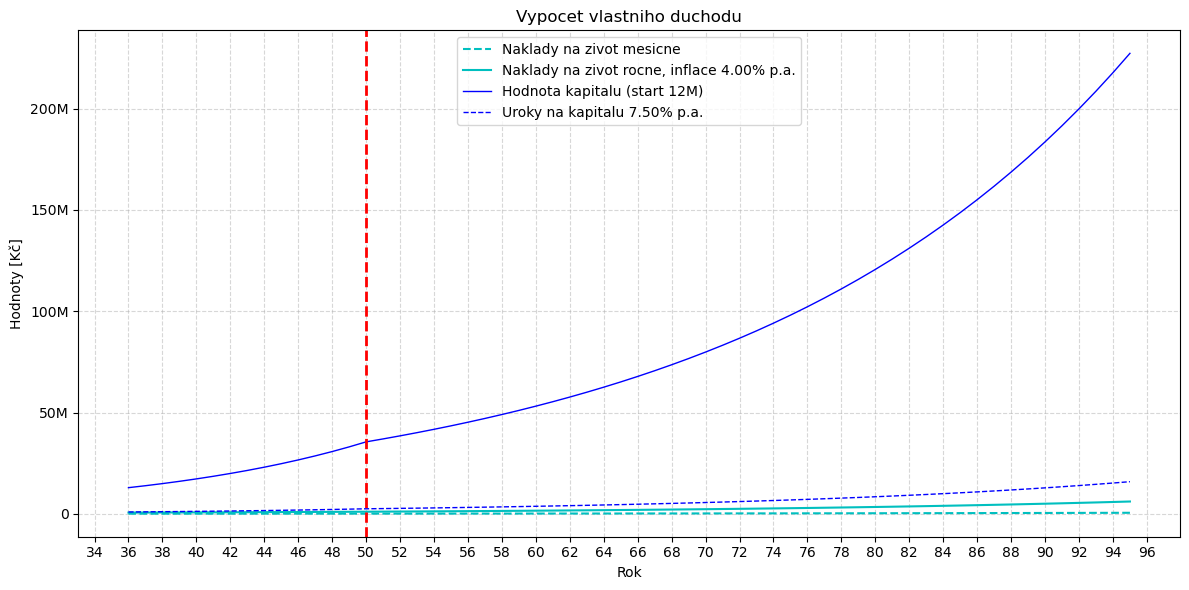

In [53]:


# ... kolik je ti ted let, zacatek grafu
kolik_ti_je = 36

# kolik ti bude let kdyz prestanes mit prijem
# a zacnes zivotni naklady platit z majetku
v_kolika_prestanes_pracovat = 50

# kdy ukoncit vypocet grafu
do_kolika_let_vypocitat = 95

# naklady na zivot v cenach ktere jsou v aktualnim roce
naklad_na_zivot_mesicne = 50_000

# dlouhodoby prumer inflace
rocni_inflace = 0.04 # 3.5%

# kolik mas ted penez v investicich?
vstupni_kapital = 12_000_000

# a jak se ti ty investice uroci?
uroceni_kapitalu = 0.075 # 7.5%


# ----- program

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator

# Vlastní formátovací funkce
def millions_formatter(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.0f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return f'{x:.0f}'

#naklad_na_zivot_rocne = naklad_na_zivot_mesicne * 12
naklad_na_zivot_v_letech_mesicne = []
naklad_na_zivot_v_letech_rocne = []
kapital = vstupni_kapital
kapital_v_letech = []
uroky_kapitalu_v_letech = []

roky = range(kolik_ti_je, do_kolika_let_vypocitat + 1)
for rok in roky:
    naklad_na_zivot_v_letech_mesicne.append(naklad_na_zivot_mesicne)
    naklad_na_zivot_v_letech_rocne.append(naklad_na_zivot_mesicne * 12)
    naklad_na_zivot_mesicne *= (1 + rocni_inflace)
    #print(f"rok {rok} naklady mesicne {naklad_na_zivot_mesicne}")

    if rok >= (v_kolika_prestanes_pracovat +1):
        naklady_na_zivot = (naklad_na_zivot_mesicne * 12)
        kapital -= naklady_na_zivot
        #print(f'rok {rok} odecitam z kapitalu: {naklady_na_zivot}')
        
        if kapital <= 0:
            kapital = 0

    urok_na_kapitalu = kapital * uroceni_kapitalu
    kapital += urok_na_kapitalu
    kapital_v_letech.append(kapital)
    uroky_kapitalu_v_letech.append(urok_na_kapitalu)
    


plt.figure(figsize=(12, 6))  # šířka 12 palců, výška 6
plt.plot(roky, naklad_na_zivot_v_letech_mesicne, 'c--', label='Naklady na zivot mesicne')
plt.plot(roky, naklad_na_zivot_v_letech_rocne, 'c', label=f'Naklady na zivot rocne, inflace {(rocni_inflace * 100):.2f}% p.a.')
plt.plot(roky, kapital_v_letech, 'b', label=f'Hodnota kapitalu (start {millions_formatter(vstupni_kapital, None)})', linewidth=1)
plt.plot(roky, uroky_kapitalu_v_letech, 'b--', label=f'Uroky na kapitalu {(uroceni_kapitalu * 100):.2f}% p.a.', linewidth=1)

plt.axvline(x=v_kolika_prestanes_pracovat, color='red', linestyle='--', linewidth=2)


# Popisky
plt.title('Vypocet vlastniho duchodu')
plt.xlabel('Rok')
plt.ylabel('Hodnoty [Kč]')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.xticks(roky)
plt.gca().xaxis.set_major_locator(MultipleLocator(2))  # Každý 2. rok

plt.legend()
plt.tight_layout()
plt.show()
